<h1><center>Sales Analysis<center><h1>

Firms rely on sales analysis to make viable business decisions. Businesses that effectively analyze this data will develop a competitive advantage. This is an analysis of synthetic data from Kaggle. The purpose is to demonstrate skill sets needed to dive deep into sales data and derive actionable intellegence. 

Within this analysis I will attempt to identify high performing sales regions and sales representatives, products that drive high profits, and build predictive models to validate assumptions. To begin my analysis I will need to perform some feature engineering, build visuals to better understand the data, and leverage multiple linear regression, random forest regression, and finishing off with a time series analysis.

<h1><center>Import the required libraries and foundational code</center></h1>

In this section we will load the preliminary packages for my analysis.

In [1]:
# Load libraries for analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utilsforecast.plotting import plot_series
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import *
from statsforecast import StatsForecast


import warnings


/opt/anaconda3/envs/analysis/lib/python3.13/site-packages/fs/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore


In [2]:
# This code standardizes illustrations
plt.rcParams['figure.figsize'] = [10,8]
plt.rc('axes', titlesize= 20, labelsize =15)
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.family'] = 'serif' # Example: change font family

In [3]:
# ignores supplemental warnings
warnings.filterwarnings('ignore')

<h1><center>Load data and perform feature engineerig</center></h1>

In this section I loaded the data and began my feature engineering. In this section I discovered the sales amount column was inaccurate. To correct this, I created a new profit column and added additional columns. The additional columns I created are net price and total cost. I also dropped the sales amount collumn and region and sales rep column. 

Other transformations I performed are creating a new dataframe incorporating dummy variables for the regression analysis. I also needed to sort the dataframe to prepare it for a time series analysis.

In [4]:
# Load data and display dataframe.
sales = pd.read_csv('sales_data.csv', 
                    index_col='Sale_Date', 
                    parse_dates=True,
                    dayfirst=True)

sales

,Product_ID,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
Sale_Date,,,,,,,,,,,,,
2023-02-03,1052,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
2023-04-21,1093,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2023-09-21,1015,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
2023-08-24,1072,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
2023-03-24,1061,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-15,1010,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
2023-09-07,1067,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
2023-04-27,1018,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David


In [5]:
# Display shape of the data frame.
print("The dimension of the data frame is:", sales.shape)

The dimension of the data frame is: (1000, 13)


In [6]:
# Display data types.
print("The data types in the data frame are:\n", sales.dtypes)

The data types in the data frame are:
 Product_ID                int64
Sales_Rep                object
Region                   object
Sales_Amount            float64
Quantity_Sold             int64
Product_Category         object
Unit_Cost               float64
Unit_Price              float64
Customer_Type            object
Discount                float64
Payment_Method           object
Sales_Channel            object
Region_and_Sales_Rep     object
dtype: object


In [7]:
# Create a new data frame called sales_t.
sales_t = sales
sales_t.head()

,Product_ID,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
Sale_Date,,,,,,,,,,,,,
2023-02-03,1052,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
2023-04-21,1093,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2023-09-21,1015,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
2023-08-24,1072,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
2023-03-24,1061,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [8]:
# Drop redundant column
sales_t.drop(columns='Region_and_Sales_Rep', inplace=True)

In [9]:
# Create a new column to display the net price of the products
sales_t['Net_Price'] = sales_t['Unit_Price']-sales_t['Discount']

In [10]:
# Found a discrepency in Sales Amount column and recalculated based 
# on net price and quantity sold.
sales_t['Profit'] = sales_t['Net_Price'] * sales_t['Quantity_Sold']

In [11]:
# Created a total cost column.
sales_t['Total_Cost']= sales_t['Unit_Cost'] * sales_t['Quantity_Sold']

In [12]:
# Drop sales amount column 
sales_t = sales_t.drop(columns='Sales_Amount')

In [13]:
# Sort index 
sales_t = sales_t.sort_index()

In [14]:
sales_t.dtypes

Product_ID            int64
Sales_Rep            object
Region               object
Quantity_Sold         int64
Product_Category     object
Unit_Cost           float64
Unit_Price          float64
Customer_Type        object
Discount            float64
Payment_Method       object
Sales_Channel        object
Net_Price           float64
Profit              float64
Total_Cost          float64
dtype: object

In [15]:
# Display dataframe with new features.
sales_t.head()

,Product_ID,Sales_Rep,Region,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Net_Price,Profit,Total_Cost
Sale_Date,,,,,,,,,,,,,,
2023-01-01,1070,Eve,South,12,Furniture,664.33,863.03,Returning,0.25,Bank Transfer,Retail,862.78,10353.36,7971.96
2023-01-01,1089,Charlie,North,35,Clothing,4071.01,4304.70,New,0.14,Credit Card,Online,4304.56,150659.60,142485.35
2023-01-01,1008,Eve,North,38,Clothing,4635.23,5075.44,Returning,0.05,Cash,Online,5075.39,192864.82,176138.74
2023-01-02,1064,David,South,10,Electronics,2242.01,2282.23,Returning,0.20,Credit Card,Online,2282.03,22820.30,22420.10
2023-01-02,1075,David,West,26,Electronics,4535.38,4557.56,New,0.00,Credit Card,Online,4557.56,118496.56,117919.88


In [16]:
sales_t.tail()

,Product_ID,Sales_Rep,Region,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Net_Price,Profit,Total_Cost
Sale_Date,,,,,,,,,,,,,,
2023-12-31,1090,Eve,West,46,Clothing,4665.12,4675.90,New,0.19,Cash,Retail,4675.71,215082.66,214595.52
2023-12-31,1094,Bob,South,15,Food,4111.93,4338.67,Returning,0.26,Credit Card,Online,4338.41,65076.15,61678.95
2024-01-01,1018,Alice,West,24,Electronics,1362.78,1729.81,New,0.29,Bank Transfer,Online,1729.52,41508.48,32706.72
2024-01-01,1098,Bob,South,11,Clothing,213.41,503.36,Returning,0.27,Bank Transfer,Online,503.09,5533.99,2347.51
2024-01-01,1078,David,East,42,Food,63.41,314.93,Returning,0.03,Cash,Retail,314.90,13225.80,2663.22


In [17]:
sales_t.dtypes

Product_ID            int64
Sales_Rep            object
Region               object
Quantity_Sold         int64
Product_Category     object
Unit_Cost           float64
Unit_Price          float64
Customer_Type        object
Discount            float64
Payment_Method       object
Sales_Channel        object
Net_Price           float64
Profit              float64
Total_Cost          float64
dtype: object

In [18]:
salesOne_hot_encoding = pd.get_dummies(sales_t).replace({True:1, False:0})

In [19]:
salesOne_hot_encoding.head()

,Product_ID,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Net_Price,Profit,Total_Cost,Sales_Rep_Alice,Sales_Rep_Bob,...,Product_Category_Electronics,Product_Category_Food,Product_Category_Furniture,Customer_Type_New,Customer_Type_Returning,Payment_Method_Bank Transfer,Payment_Method_Cash,Payment_Method_Credit Card,Sales_Channel_Online,Sales_Channel_Retail
Sale_Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1070,12,664.33,863.03,0.25,862.78,10353.36,7971.96,0,0,...,0,0,1,0,1,1,0,0,0,1
2023-01-01,1089,35,4071.01,4304.70,0.14,4304.56,150659.60,142485.35,0,0,...,0,0,0,1,0,0,0,1,1,0
2023-01-01,1008,38,4635.23,5075.44,0.05,5075.39,192864.82,176138.74,0,0,...,0,0,0,0,1,0,1,0,1,0
2023-01-02,1064,10,2242.01,2282.23,0.20,2282.03,22820.30,22420.10,0,0,...,1,0,0,0,1,0,0,1,1,0
2023-01-02,1075,26,4535.38,4557.56,0.00,4557.56,118496.56,117919.88,0,0,...,1,0,0,1,0,0,0,1,1,0


In [20]:
sales_t.head()

,Product_ID,Sales_Rep,Region,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Net_Price,Profit,Total_Cost
Sale_Date,,,,,,,,,,,,,,
2023-01-01,1070,Eve,South,12,Furniture,664.33,863.03,Returning,0.25,Bank Transfer,Retail,862.78,10353.36,7971.96
2023-01-01,1089,Charlie,North,35,Clothing,4071.01,4304.70,New,0.14,Credit Card,Online,4304.56,150659.60,142485.35
2023-01-01,1008,Eve,North,38,Clothing,4635.23,5075.44,Returning,0.05,Cash,Online,5075.39,192864.82,176138.74
2023-01-02,1064,David,South,10,Electronics,2242.01,2282.23,Returning,0.20,Credit Card,Online,2282.03,22820.30,22420.10
2023-01-02,1075,David,West,26,Electronics,4535.38,4557.56,New,0.00,Credit Card,Online,4557.56,118496.56,117919.88


<h1><center> Visualize data to find seasonality and trends </center></h1>

In this section I created several illustrations to develop a better understanding of the data. The illustrations I chose are a scatter plot, a stacked bar plot, a box plot, a histogram, and a violin plot. These graphs provide different insights to understand the data. 

The scatter plot helps to identify a relationship between profit and quantity sold. I also incorporated unit cost to highlight how this feature affects the plot. What I noticed is unit cost has a positive effect on profits. The darker color reflects a higher unit cost. 

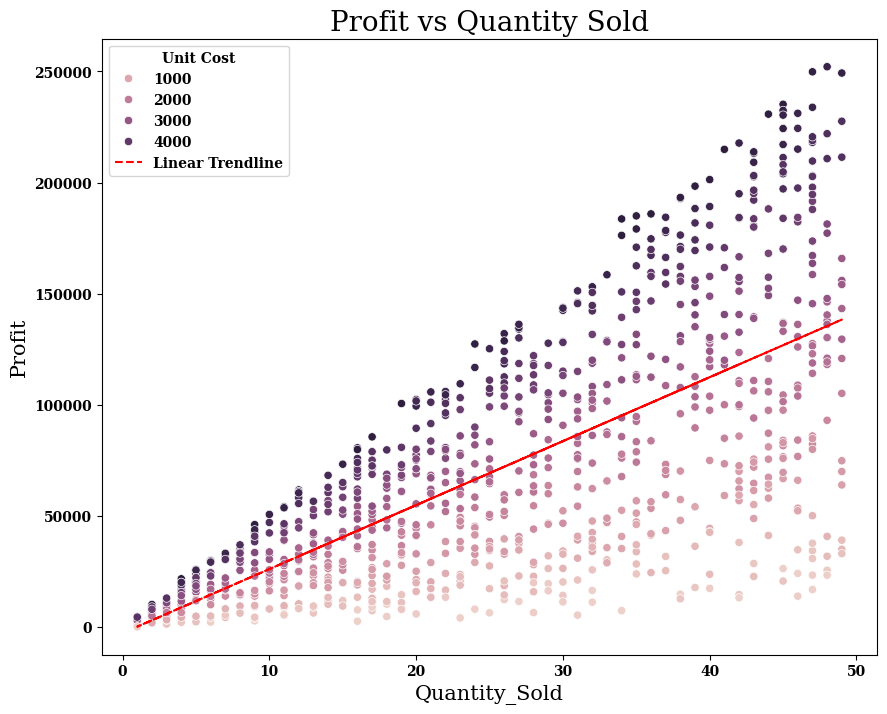

In [21]:
# scatter plot showing a positive trend with profit and quantity sold.
sns.scatterplot(data=salesOne_hot_encoding, x='Quantity_Sold', y='Profit', hue='Unit_Cost')
z = np.polyfit(salesOne_hot_encoding['Quantity_Sold'], salesOne_hot_encoding['Profit'], 1)
p = np.poly1d(z)
plt.plot(salesOne_hot_encoding['Quantity_Sold'], p(salesOne_hot_encoding['Quantity_Sold']), "r--", label="Linear Trendline")
plt.title('Profit vs Quantity Sold')
plt.legend(title ='Unit Cost')
plt.show()

The second plot is a stacked bar plot. This illustration highlights sales rep profitibility. Each sales rep is compared based on products sold. The goal is to identify the best reps and the products that's driving sales.

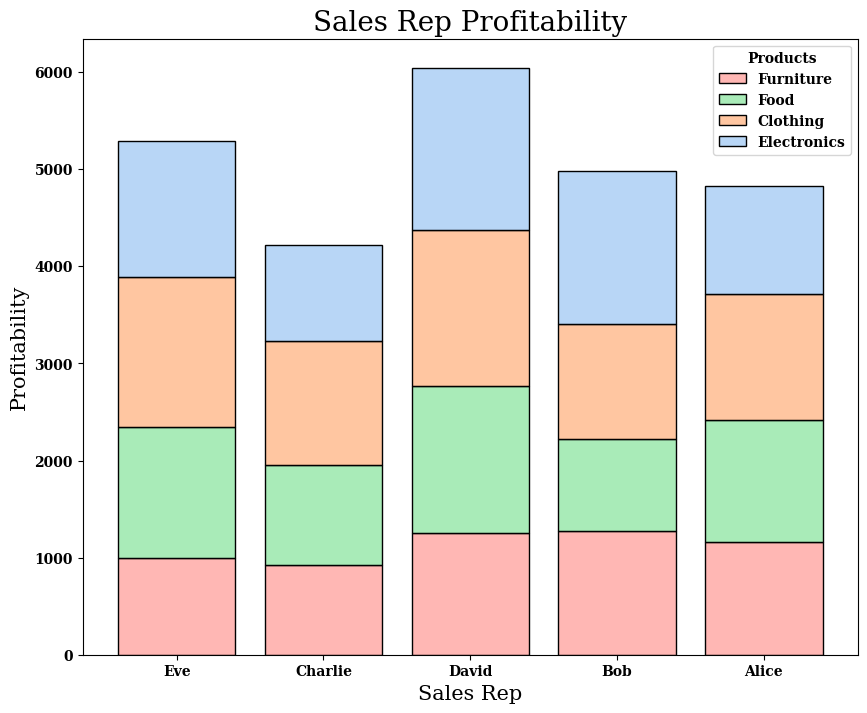

In [22]:
# Stacked barplot outlining the products sold by sales rep.
color_map = ('Furniture', 'Food', 'Clothing', 'Electronics')
sns.histplot(data=sales_t, x='Sales_Rep',weights='Quantity_Sold', 
             hue='Product_Category', multiple='stack',shrink=0.8, palette='pastel')
plt.title('Sales Rep Profitability')
plt.xlabel('Sales Rep')
plt.ylabel('Profitability')
plt.legend(color_map, title='Products')
plt.show()

The third illustration is a box plot comparing product sold per region. In this visual I noticed that the food category shows the highest variability in median pricing and no extremes in the pricing. I also noticed that furniture has the least variability in median pricing. 

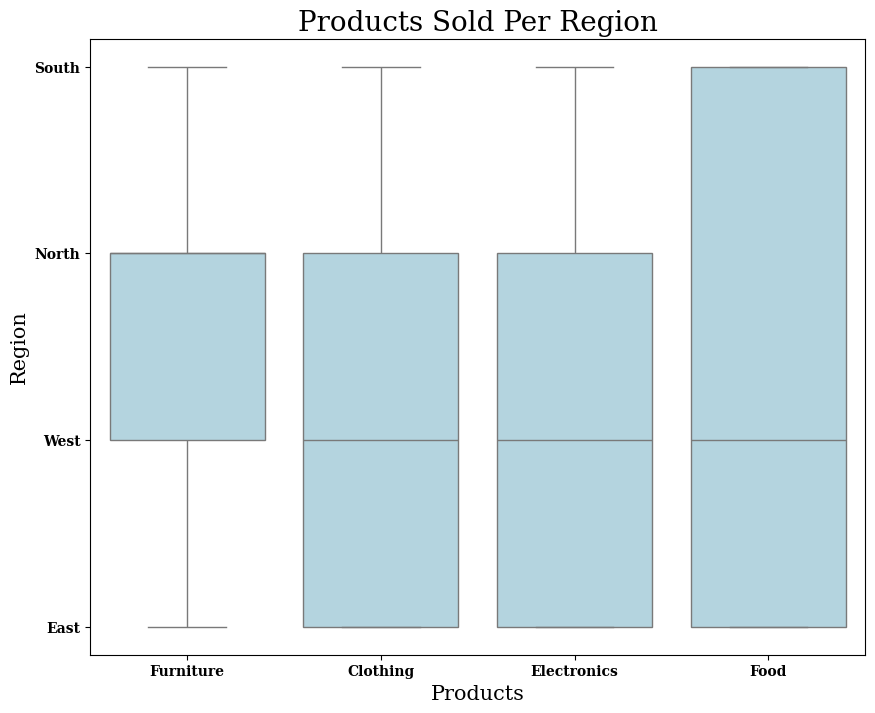

In [23]:
# box plot to compare products sold per region.
sns.boxplot(data=sales_t, x='Product_Category', y= 'Region', color='lightblue')
plt.title('Products Sold Per Region')
plt.xlabel('Products')
plt.ylabel('Region')
plt.show()

The fourth visual is a histogram showing products sold per region. The goal of this plot is to understand what products are sold in the respective regions. This plot shows the south region is selling all products at a much higher rate than the other regions. Understanding why the south region is more items in each product category deserves more investigation. Being able to reporduce their success will help to drive market share in all regions.

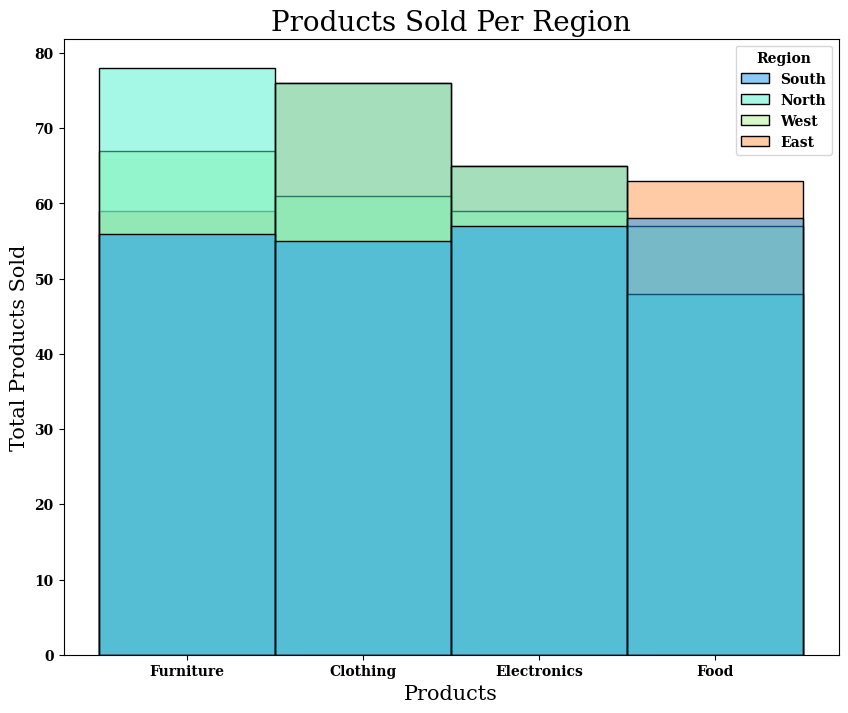

In [24]:
# Histogram to display products sold per reigon.

sns.histplot(sales_t, x = 'Product_Category', hue= 'Region', palette='rainbow')
plt.title('Products Sold Per Region')
plt.xlabel('Products')
plt.ylabel('Total Products Sold')
plt.show()

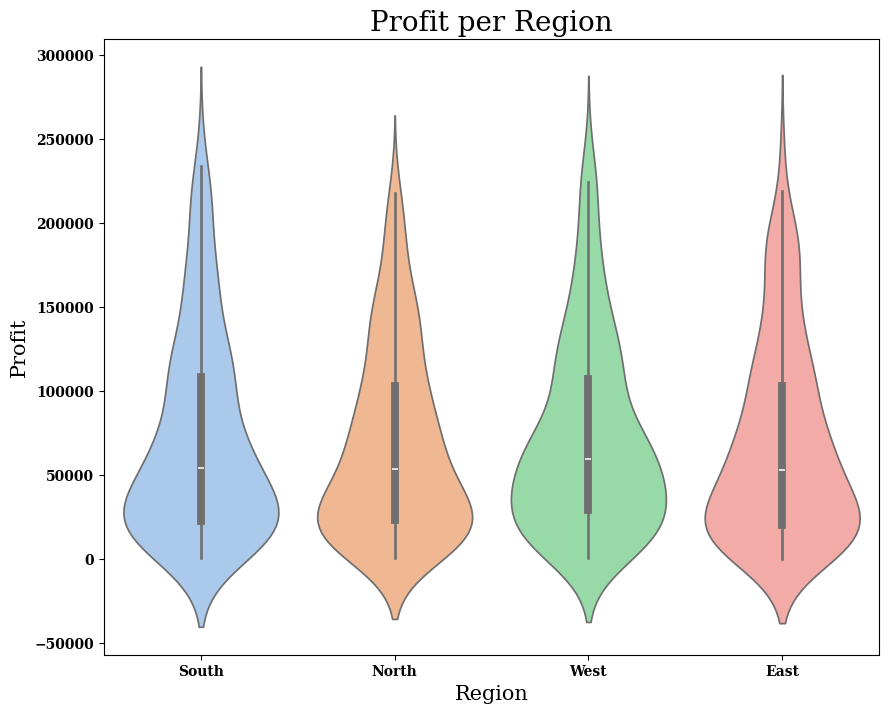

In [25]:
# Violin plot that shows the profit per sales region 
sns.violinplot(data=sales_t, x='Region', y='Profit', palette='pastel')
plt.title('Profit per Region')
plt.xlabel('Region')
plt.ylabel('Profit')

plt.show()


<h1><center>Liear Regresssion Analysis</center></h1>

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# Resets the index for the data set.
salesOne_hot_encoding = salesOne_hot_encoding.reset_index()
salesOne_hot_encoding.head()

,Sale_Date,Product_ID,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Net_Price,Profit,Total_Cost,Sales_Rep_Alice,...,Product_Category_Electronics,Product_Category_Food,Product_Category_Furniture,Customer_Type_New,Customer_Type_Returning,Payment_Method_Bank Transfer,Payment_Method_Cash,Payment_Method_Credit Card,Sales_Channel_Online,Sales_Channel_Retail
0,2023-01-01,1070,12,664.33,863.03,0.25,862.78,10353.36,7971.96,0,...,0,0,1,0,1,1,0,0,0,1
1,2023-01-01,1089,35,4071.01,4304.70,0.14,4304.56,150659.60,142485.35,0,...,0,0,0,1,0,0,0,1,1,0
2,2023-01-01,1008,38,4635.23,5075.44,0.05,5075.39,192864.82,176138.74,0,...,0,0,0,0,1,0,1,0,1,0
3,2023-01-02,1064,10,2242.01,2282.23,0.20,2282.03,22820.30,22420.10,0,...,1,0,0,0,1,0,0,1,1,0
4,2023-01-02,1075,26,4535.38,4557.56,0.00,4557.56,118496.56,117919.88,0,...,1,0,0,1,0,0,0,1,1,0


In [28]:
# Drops the sales date column.
salesOne_hot_encoding.drop(columns='Sale_Date', inplace=True)

In [29]:
# Split the data between the X and y variables.
X = salesOne_hot_encoding.drop(columns='Profit')
y = salesOne_hot_encoding['Profit']

In [30]:
# Displays the vaiables for the X data set.
X.head()

,Product_ID,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Net_Price,Total_Cost,Sales_Rep_Alice,Sales_Rep_Bob,Sales_Rep_Charlie,...,Product_Category_Electronics,Product_Category_Food,Product_Category_Furniture,Customer_Type_New,Customer_Type_Returning,Payment_Method_Bank Transfer,Payment_Method_Cash,Payment_Method_Credit Card,Sales_Channel_Online,Sales_Channel_Retail
0,1070,12,664.33,863.03,0.25,862.78,7971.96,0,0,0,...,0,0,1,0,1,1,0,0,0,1
1,1089,35,4071.01,4304.70,0.14,4304.56,142485.35,0,0,1,...,0,0,0,1,0,0,0,1,1,0
2,1008,38,4635.23,5075.44,0.05,5075.39,176138.74,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,1064,10,2242.01,2282.23,0.20,2282.03,22420.10,0,0,0,...,1,0,0,0,1,0,0,1,1,0
4,1075,26,4535.38,4557.56,0.00,4557.56,117919.88,0,0,0,...,1,0,0,1,0,0,0,1,1,0


In [31]:
# Displays the data for the y variable.
y.head()

0     10353.36
1    150659.60
2    192864.82
3     22820.30
4    118496.56
Name: Profit, dtype: float64

In [32]:
# Split data between training and testing sets.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
# Validates the data was split appropriately between training and testing sets.
print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of X_test is: {X_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of X_train is: (800, 27)
The shape of X_test is: (200, 27)
The shape of y_train is: (800,)
The shape of y_test is: (200,)


In [34]:
# Creates the object for the linear regression.
model = LinearRegression()

In [35]:
# Uses the training data to build the linear regression.
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predicts the target variables for the linear regression
y_pred = model.predict(X_test )

In [37]:
# This code calculates the accuracy measures for linear regression.
rsme = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_sq = r2_score(y_test, y_pred)

In [38]:
# This code prints my accuracy measures
print(f"The root squared mean error is:\n{rsme: 0.4f}\n")
print(f"The mean  squared error is:\n{mse: 0.4f}\n")
print(f"The mean absolute error is: \n{mae: 0.4f}\n")
print(f"The r2 score is:\n {r_sq: 0.4f}\n")

The root squared mean error is:
 1891.6137

The mean  squared error is:
 3578202.4078

The mean absolute error is: 
 1403.4101

The r2 score is:
  0.9990



In [39]:
# This code cross validates my linear regression.
model_kfolds = LinearRegression()
n_splits = 5
kf = KFold(n_splits= n_splits, shuffle=True, random_state=2)
scores = cross_val_score(model_kfolds, X_train, y_train, cv=kf, scoring='r2')

print(f"The R-Squared score for each fold is:\n {scores}\n")
print(f"The Mean R-Squared score is: \n{np.mean(scores)}\n")
print(f"The Standard Deviation of the R-Sqared scores are: \n{np.std(scores)}\n")

The R-Squared score for each fold is:
 [0.99855249 0.99867455 0.9990205  0.99869927 0.99893446]

The Mean R-Squared score is: 
0.9987762545736537

The Standard Deviation of the R-Sqared scores are: 
0.00017379596566544938



<h1><center>Random Forest</center></h1>

In [40]:
# Create my X and y variables for the random forest analysis
X = salesOne_hot_encoding.drop(columns=('Profit'))
y = salesOne_hot_encoding['Profit']

In [41]:
# Display the shape of my data
print(f" The shape of X data is:\n", X.shape)
print(f" \nThe shape of y data is:\n", y.shape)

 The shape of X data is:
 (1000, 27)
 
The shape of y data is:
 (1000,)


In [42]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size = 0.2, random_state =31)

In [43]:
print(f"The shape of my X_trai_r data is:\n", X_train_r.shape)
print(f"\nThe shape of my X_test_r data is:\n", X_test_r.shape)
print(f"\nThe shape of my y_train_r data is:\n", y_train_r.shape)
print(f"\nThe shape of my y_test_r data is:\n", y_test_r.shape)

The shape of my X_trai_r data is:
 (800, 27)

The shape of my X_test_r data is:
 (200, 27)

The shape of my y_train_r data is:
 (800,)

The shape of my y_test_r data is:
 (200,)


In [44]:
randModel = RandomForestRegressor(n_estimators=100, random_state=31)

In [45]:
randModel.fit(X_train_r,y_train_r)

RandomForestRegressor(random_state=31)

In [46]:
y_pred_r= randModel.predict(X_test_r)

In [47]:
mae_r = mean_absolute_error(y_test_r, y_pred_r)
mse_r = mean_squared_error(y_test_r, y_pred_r)
rmse_r = root_mean_squared_error(y_test_r, y_pred_r)
r2_r = r2_score(y_test_r, y_pred_r)

In [48]:
print(f" The Mean Absloute Error(MAE) is: \n{mae_r: .2f}")
print(f" \nThe Mean Squared Error(MSE) is: \n{mse_r: .2f}")
print(f" \nThe Root Mean Squared Error(MAE) is: \n{rmse_r: .2f}")
print(f" \nThe R2 Score is: \n{r2_r: .2f}")

 The Mean Absloute Error(MAE) is: 
 3153.57
 
The Mean Squared Error(MSE) is: 
 18784684.53
 
The Root Mean Squared Error(MAE) is: 
 4334.13
 
The R2 Score is: 
 0.99


<h1><center>Time Series Analysis</center></h1>

In [49]:
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
# Reindex sales data to reset
sales = sales.reset_index()
sales.head()

,Sale_Date,Product_ID,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Net_Price,Profit,Total_Cost
0,2023-02-03,1052,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,267.13,4808.34,2749.50
1,2023-04-21,1093,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,4209.33,71558.61,64878.63
2,2023-09-21,1015,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,371.20,11136.00,7846.80
3,2023-08-24,1072,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,4467.73,174241.47,168871.17
4,2023-03-24,1061,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,692.63,9004.19,8285.81


In [ ]:
sales['Sale_Date'] = pd.to_datetime(sales['Sale_Date'],format ='%Y-%m-%d')

In [ ]:
salesTS = sales.groupby(pd.Grouper(key='Sale_Date', freq='D'))['Profit'].mean()
salesTS = salesTS.backfill()

In [ ]:
salesTS.head()

Sale_Date
2023-01-01    117959.260000
2023-01-02     70658.430000
2023-01-03     85982.196667
2023-01-04     46595.333333
2023-01-05     28773.340000
Freq: D, Name: Profit, dtype: float64

In [ ]:
salesTS.tail()

Sale_Date
2023-12-28     51977.870000
2023-12-29     69693.732500
2023-12-30     44422.620000
2023-12-31    126844.156000
2024-01-01     20089.423333
Freq: D, Name: Profit, dtype: float64

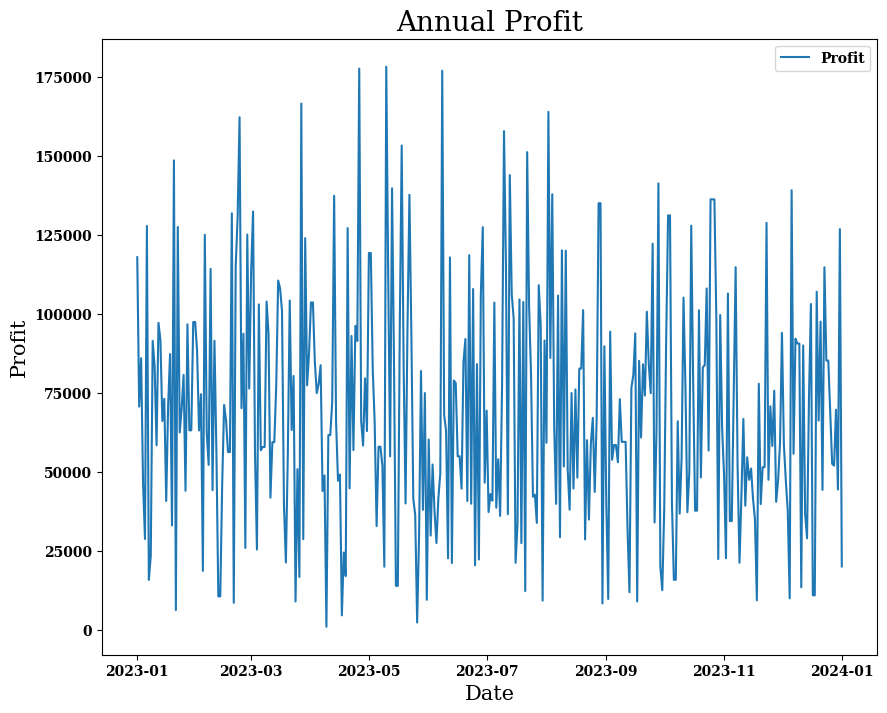

In [ ]:
plt.plot(salesTS,label='Profit')
plt.title('Annual Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

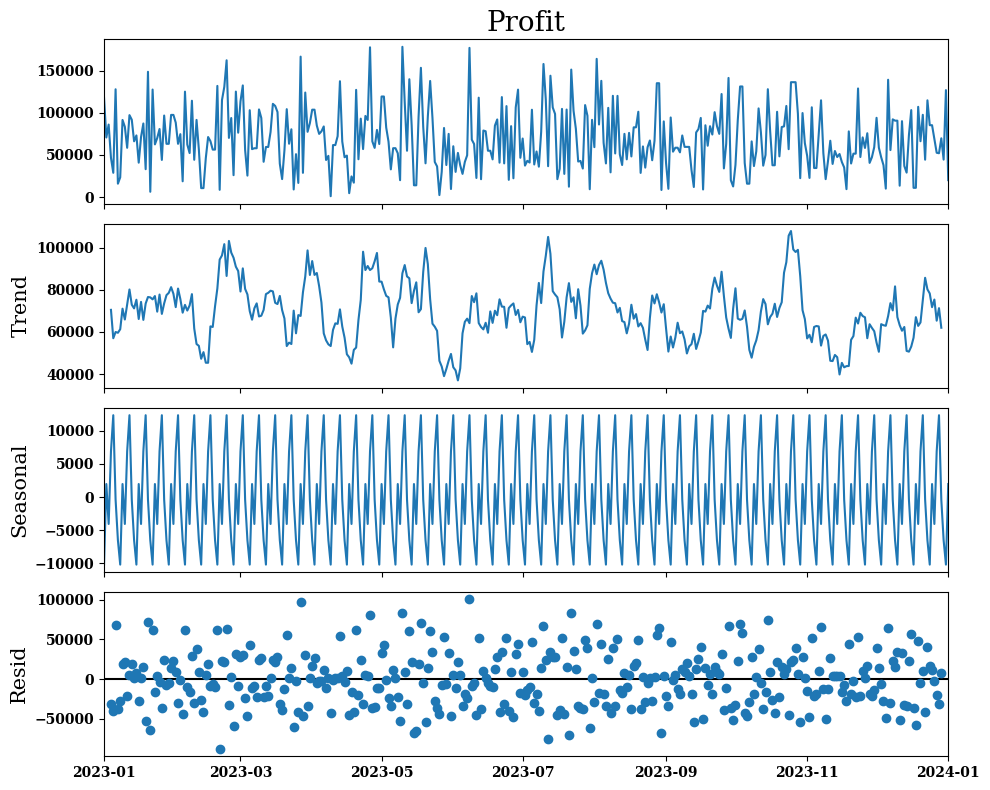

In [ ]:
decomposition = seasonal_decompose(salesTS, model='additive')
fig=decomposition.plot()
plt.show()

In [ ]:
# Function to determine stationarity using adfuller
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print("Augumented Adfuller test results:")
    print("ADF Statistic:", result[0])
    print("P-Value:", result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print(f"\t {key}: {value}")
    return result[1]< 0.5

is_stationary = check_stationarity(salesTS)
print(f"\nTime series is {'stationary' if is_stationary else non-stationary}")


Augumented Adfuller test results:
ADF Statistic: -11.731437055008556
P-Value: 1.3387421481089569e-21
Critical Values:
	 1%: -3.448493650810824
	 5%: -2.8695352280356556
	 10%: -2.5710293341377715

Time series is stationary


In [ ]:
auto_model = auto_arima(salesTS,
                        start_p=0, start_q=0,
                        max_p=5, max_q=5,
                        m=12,
                        seasonal=True,
                        d=None,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=8747.117, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=8750.728, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=8750.726, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=9294.013, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=8749.093, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=8749.002, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=8748.798, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=8748.842, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=8750.723, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.417 seconds


In [ ]:
# Build the Arima model
model = ARIMA(salesTS,
              order = auto_model.order,
              seasonal_order = auto_model.seasonal_order)
result=model.fit()

In [ ]:
# Create the forecast for the time series analysis
forecast_period = 12
forecast = result.get_forecast(steps=forecast_period)
mean_forecast = forecast.predicted_mean

In [ ]:
conf_int_95 = forecast.conf_int(alpha=0.05)
conf_int_80 = forecast.conf_int(alpha=0.20)
conf_int_70 = forecast.conf_int(alpha=0.30) 

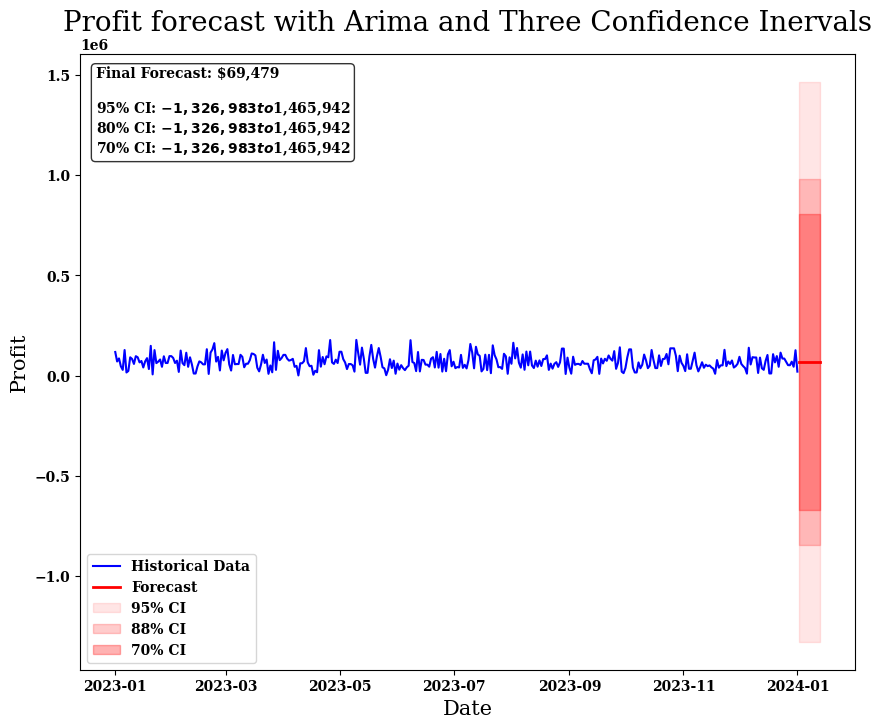

In [ ]:
# Plot historical data and forecast

plt.plot(salesTS, color='blue', label='Historical Data')
plt.plot(mean_forecast, label = 'Forecast', color = 'red', linewidth = 2)

# Plot confidence intervals
plt.fill_between(mean_forecast.index,
                 conf_int_95.iloc[:, 0],
                 conf_int_95.iloc[:, 1],
                 color = 'red', alpha=0.1,
                 label = '95% CI')

plt.fill_between(mean_forecast.index,
                 conf_int_80.iloc[:, 0],
                 conf_int_80.iloc[:, 1],
                 color = 'red', alpha=0.2,
                 label = '88% CI')

plt.fill_between(mean_forecast.index,
                 conf_int_70.iloc[:, 0],
                 conf_int_70.iloc[:, 1],
                 color = 'red', alpha=0.3,
                 label = '70% CI')

plt.title('Profit forecast with Arima and Three Confidence Inervals')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
#plt.grid(True, alpha = 0.3)

# Get final values

last_forecast = mean_forecast.iloc[-1]
ranges_95_lower = conf_int_95.iloc[-1,0]
ranges_95_upper = conf_int_95.iloc[-1,1]
ranges_80_lower = conf_int_95.iloc[-1,0]
ranges_80_upper = conf_int_95.iloc[-1,1]
ranges_70_lower = conf_int_95.iloc[-1,0]
ranges_70_upper = conf_int_95.iloc[-1,1]

# Create into text

info_text = f'Final Forecast: ${last_forecast:,.0f}\n\n' \
            f'95% CI: ${ranges_95_lower:,.0f} to ${ranges_95_upper:,.0f}\n' \
            f'80% CI: ${ranges_80_lower:,.0f} to ${ranges_80_upper:,.0f}\n' \
            f'70% CI: ${ranges_70_lower:,.0f} to ${ranges_70_upper:,.0f}' 

plt.text(0.02, 0.98, info_text,
         transform=plt.gca().transAxes,
         verticalalignment= 'top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


plt.show()

In [ ]:
# Calculate and display metrics
mse= mean_squared_error(salesTS, result.fittedvalues)
rmse = np.sqrt(mse)
mae = mean_absolute_error(salesTS, result.fittedvalues)

print(f"Mean Squared Error(MSE) is: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) is: {rmse:.2f}")
print(f"Mean Absoulute Error (MAE)is: {mae:.2f}")

# Print forecast information.
print(f"\nForecast Ranges for Final Period:")
print(f"Point Forecast: ${last_forecast:,.2f}")
print(f"\nConfidence Intervals (CI):")
print(f"95% CI: ${ranges_95_lower:,.2f} to ${ranges_95_upper:,.2f}")
print(f"80% CI: ${ranges_80_lower:,.2f} to ${ranges_80_upper:,.2f}")
print(f"70% CI: ${ranges_70_lower:,.2f} to ${ranges_70_upper:,.2f}")

# Calculate and print interval widths.
print(f"\nInterval Widths as a Percentage of Forecast")
print(f"95% CI: \u00B1{((ranges_95_upper - ranges_95_lower)/2/last_forecast*100):,.1f}%")
print(f"80% CI: \u00B1{((ranges_80_upper - ranges_80_lower)/2/last_forecast*100):,.1f}%")
print(f"70% CI: \u00B1{((ranges_70_upper - ranges_70_lower)/2/last_forecast*100):,.1f}%")

# Create forecast dataframe
forecast_df = pd.DataFrame({
    'Forecast': mean_forecast,
    '95% Lower': conf_int_95.iloc[:,0],
    '95% Upper': conf_int_95.iloc[:,1],
    '80% Lower': conf_int_80.iloc[:,0],
    '80% Upper': conf_int_80.iloc[:,1],
    '70% Lower': conf_int_70.iloc[:,0],
    '70% Upper': conf_int_70.iloc[:,1]
})

print("\nDetailed Forecast with Confidence Intervals:")
print(forecast_df)



Mean Squared Error(MSE) is: 1387015466.13
Root Mean Squared Error (RMSE) is: 37242.66
Mean Absoulute Error (MAE)is: 30439.92

Forecast Ranges for Final Period:
Point Forecast: $69,479.42

Confidence Intervals (CI):
95% CI: $-1,326,983.11 to $1,465,941.94
80% CI: $-1,326,983.11 to $1,465,941.94
70% CI: $-1,326,983.11 to $1,465,941.94

Interval Widths as a Percentage of Forecast
95% CI: ±2,009.9%
80% CI: ±2,009.9%
70% CI: ±2,009.9%

Detailed Forecast with Confidence Intervals:
                Forecast     95% Lower     95% Upper      80% Lower  \
2024-01-02  69479.419692 -1.326983e+06  1.465942e+06 -843618.345984   
2024-01-03  69479.419692 -1.326983e+06  1.465942e+06 -843618.345984   
2024-01-04  69479.419692 -1.326983e+06  1.465942e+06 -843618.345984   
2024-01-05  69479.419692 -1.326983e+06  1.465942e+06 -843618.345984   
2024-01-06  69479.419692 -1.326983e+06  1.465942e+06 -843618.345984   
2024-01-07  69479.419692 -1.326983e+06  1.465942e+06 -843618.345984   
2024-01-08  69479.41969

In [ ]:
models = []

specifications = [
    {
        'name': 'Fixed Parameters',
        'model': ExponentialSmoothing(
            salesTS,
            seasonal_periods = 12,
            trend = 'add',
            seasonal = 'add',
            damped_trend = True
       ).fit(
           smoothing_level = 0.2,
           smoothing_trend = 0.1,
           smoothing_seasonal = 0.1,
           damping_trend = 0.98,
           optimized = False
       )

    },
    {
        'name': 'Multiplicative Seasonal',
        'model': ExponentialSmoothing(
            salesTS,
            seasonal_periods = 12,
            trend = 'add',
            seasonal = 'mul',
            damped_trend = True
       ).fit(
           smoothing_level = 0.2,
           smoothing_trend = 0.1,
           smoothing_seasonal = 0.1,
           damping_trend = 0.98,
           optimized = False
       )
    },
    {
       'name': 'Multiplicative Trend',
        'model': ExponentialSmoothing(
            salesTS,
            seasonal_periods = 12,
            trend = 'mul',
            seasonal = 'add',
            damped_trend = True
       ).fit(
           smoothing_level = 0.2,
           smoothing_trend = 0.1,
           smoothing_seasonal = 0.1,
           damping_trend = 0.98,
           optimized = False
       ) 
    }
]

In [ ]:
results =[]
for spec in specifications:
    model = spec['model']
    name = spec['name']

# Calcualte metrics
rmse = np.sqrt(mean_squared_error(salesTS, model.fittedvalues))
mae = mean_absolute_error(salesTS, model.fittedvalues)

results.append({
    'name': name,
    'rmse': rmse,
    'mae': mae,
    'model': model
})



In [ ]:
best_model = min(results, key=lambda x: x['rmse'])
hw_model = best_model['model']
hw_forecast = hw_model.forecast(12)

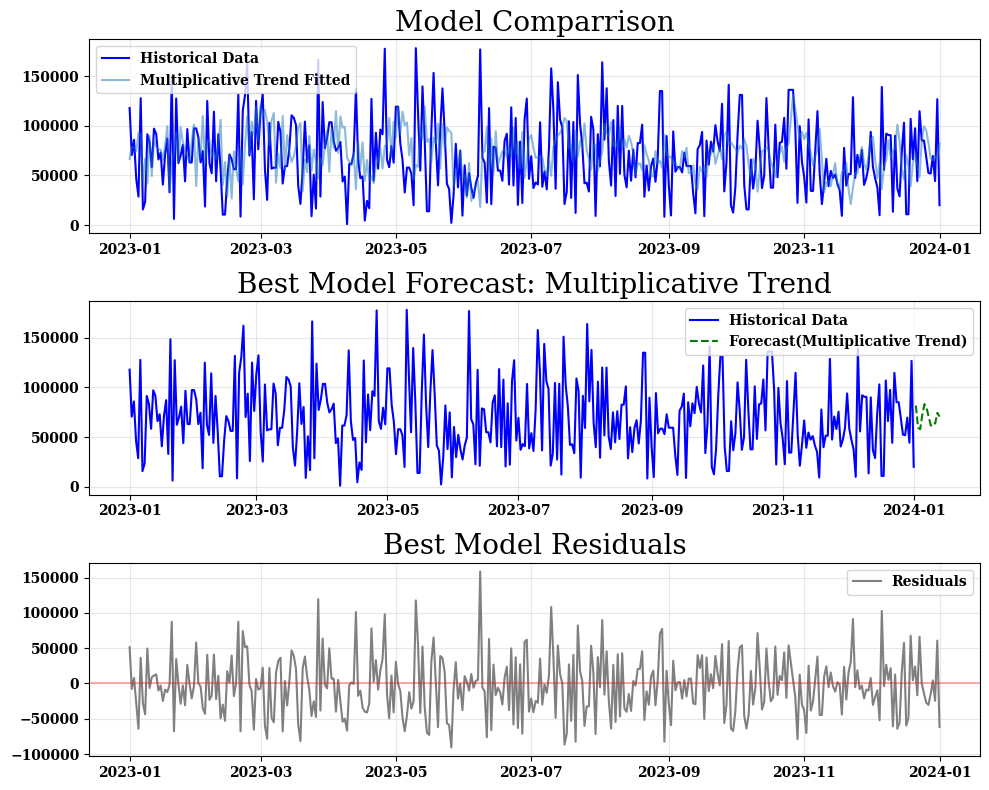

In [ ]:
# First subplot: All models
plt.subplot(3, 1, 1)
plt.plot(salesTS.index, salesTS, label = 'Historical Data', color = 'blue')
for result in results:
    plt.plot(result['model'].fittedvalues.index,
             result['model'].fittedvalues,
             label = f"{result['name']} Fitted",
             alpha = 0.5)
plt.title('Model Comparrison')
plt.legend()
plt.grid(True, alpha=0.3)

# Second subplot
plt.subplot(3, 1, 2)
plt.plot(salesTS.index, salesTS, label = 'Historical Data', color = 'blue')
plt.plot(hw_forecast.index, hw_forecast,
         label = f'Forecast({best_model['name']})',
          color = 'green', linestyle= '--' )
plt.title(f'Best Model Forecast: {best_model["name"]}')
plt.legend()
plt.grid(True, alpha = 0.3)

# Third subplot, residuals of best model
plt.subplot(3, 1, 3)
residuals= salesTS - hw_model.fittedvalues
plt.plot(salesTS.index, residuals, label = 'Residuals', color = 'gray')
plt.axhline(y = 0, color = 'r', linestyle = '-', alpha = 0.3)
plt.title('Best Model Residuals')
plt.legend()
plt.grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("\nModel Comparison:")
for result in results:
    print(f"\n{result['name']}:")
    print(f"\nRMSE:${result['rmse']: .2f}")
    print(f"\nMAE: ${result['mae']: .2f}")

print(f"\nBest Model: {best_model['name']}")
print(f"Best RMSE: ${best_model['rmse']: .2f}")


Model Comparison:

Multiplicative Trend:

RMSE:$ 41741.03

MAE: $ 33003.13

Best Model: Multiplicative Trend
Best RMSE: $ 41741.03


In [ ]:
print("\nBest Model Parameters:")
print(f"- Smoothing level (\u03B1): {hw_model.params['smoothing_level']: .3f}")
print(f"- Trend smoothing ('\u03B2'): {hw_model.params['smoothing_trend']: .3f}")
print(f"- Seasonal smoothing ('\u03B3'): {hw_model.params['smoothing_seasonal']: .3f}")
print(f"- Damping parameter ('\u03C6'): {hw_model.params['damping_trend']: .3f}")


Best Model Parameters:
- Smoothing level (α):  0.200
- Trend smoothing ('β'):  0.100
- Seasonal smoothing ('γ'):  0.100
- Damping parameter ('φ'):  0.980


In [ ]:
hw_forecast

2024-01-02    81865.345571
2024-01-03    59613.978860
2024-01-04    57972.972971
2024-01-05    72589.526887
2024-01-06    83209.369705
2024-01-07    79003.626790
2024-01-08    70186.444888
2024-01-09    61513.320980
2024-01-10    64358.354560
2024-01-11    63780.060389
2024-01-12    74451.320733
2024-01-13    70661.597201
Freq: D, dtype: float64

In [ ]:
final_results = pd.DataFrame({
    'Actual': salesTS,
    'Fitted': hw_model.fittedvalues,
    'residuals': residuals

})

In [ ]:
final_results

,Actual,Fitted,residuals
Sale_Date,,,
2023-01-01,117959.260000,66675.931156,51283.328844
2023-01-02,70658.430000,78367.578698,-7709.148698
2023-01-03,85982.196667,78134.024924,7848.171743
2023-01-04,46595.333333,74541.229275,-27945.895942
2023-01-05,28773.340000,92952.934140,-64179.594140
...,...,...,...
2023-12-28,51977.870000,67365.193383,-15387.323383
2023-12-29,69693.732500,65476.658151,4217.074349
2023-12-30,44422.620000,69010.980474,-24588.360474
